# Spurious Open Data Correlations

## Load Datasets

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
births = pd.read_csv("../data/Geburten.csv", sep=";")
salary = pd.read_csv("../data/Reallohnindex.csv", sep=";")
electricity_use = pd.read_csv("../data/kWh Verbrauch des Seniorendomizil Am Alboinplatz.csv", sep=',')

In [20]:
births

,Jahr,Anzahl Lebendgeborene Berlin
0,2011,33075
1,2012,34678
2,2013,35038
3,2014,37368
4,2015,38030
5,2016,41087
6,2017,40163
7,2018,40203
8,2019,39503
9,2020,38693


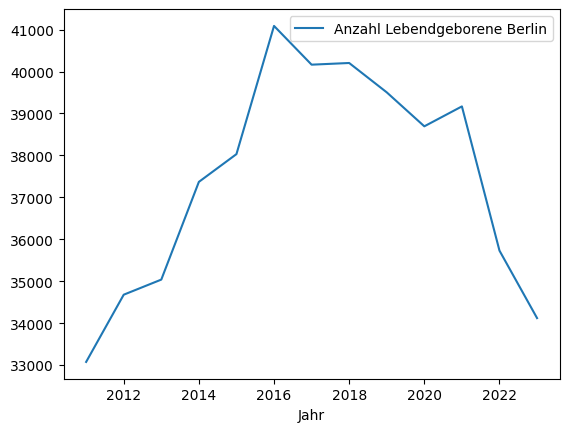

In [24]:
births.plot(x="Jahr", y="Anzahl Lebendgeborene Berlin")
plt.show()

In [25]:
salary

,Jahr,Veränderung gegenüber dem Vorjahr in %
0,2015,"4,1"
1,2016,"1,7"
2,2017,"1,5"
3,2018,"1,6"
4,2019,"2,5"
5,2020,"0,9"
6,2021,1
7,2022,-2
8,2023,"-0,2"
9,2024,"4,5"


In [36]:
salary["Veränderung gegenüber dem Vorjahr in %"] = salary["Veränderung gegenüber dem Vorjahr in %"].str.replace(',','.').astype(float)

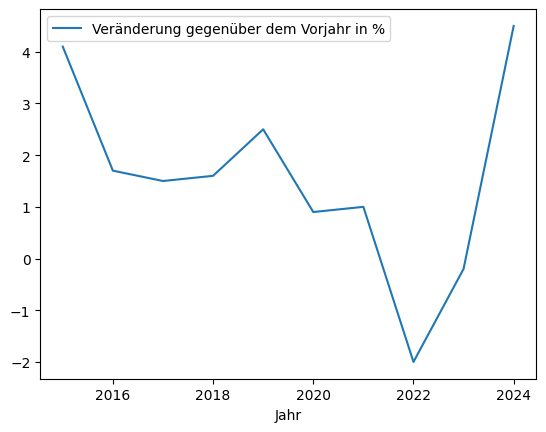

In [38]:
salary.plot(x="Jahr", y="Veränderung gegenüber dem Vorjahr in %")
plt.show()

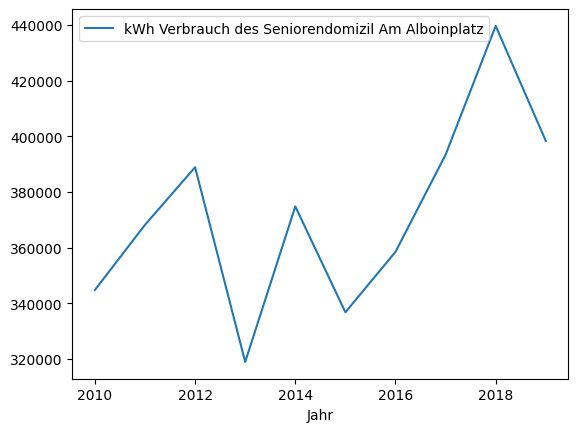

In [40]:
electricity_use.plot(x="Jahr", y="kWh Verbrauch des Seniorendomizil Am Alboinplatz")
plt.show()

In [42]:
from scipy.stats import pearsonr

In [44]:
# Merge datasets on year, keeping only overlapping years
merged = pd.merge(
    births[["Jahr", "Anzahl Lebendgeborene Berlin"]],
    electricity_use[["Jahr", "kWh Verbrauch des Seniorendomizil Am Alboinplatz"]],
    on="Jahr",
    how="inner" 
)

In [45]:
merged = merged.dropna()

In [46]:
corr, p_value = pearsonr(merged["Anzahl Lebendgeborene Berlin"], 
                         merged["kWh Verbrauch des Seniorendomizil Am Alboinplatz"])

In [47]:
# AI spuriousness check (mock-up)
if abs(corr) > 0.7 and p_value < 0.05:
    print(f"Spurious correlation found: r = {corr:.2f} (Solar energy ↔ Bike accidents)")
else:
    print("No significant spurious link detected")

No significant spurious link detected


In [51]:
import numpy as np
from scipy import stats

# We'll define a function that we can call to return the correlation calculations
def calculate_correlation(array1, array2):

    # Calculate Pearson correlation coefficient and p-value
    correlation, p_value = stats.pearsonr(array1, array2)

    # Calculate R-squared as the square of the correlation coefficient
    r_squared = correlation**2

    return correlation, r_squared, p_value

# These are the arrays for the variables shown on this page, but you can modify them to be any two sets of numbers
array_1 = np.array([30.2333,30.2245,30.2148,30.2058,30.1956,30.1871,30.1795,30.1729,30.166,30.1594,30.1521,30.1437,30.1342,30.1234,30.1118,30.0994,30.0881,30.0772,30.0674,30.0579,30.0512,30.0443,30.0374,30.0289,30.0219,30.0128,30.0028,29.9907,29.9817,29.9718,29.9628,29.9532,29.9488,29.9434,29.9387,29.9317,29.9286,29.9224,])
array_2 = np.array([1050.6,1187.7,1138,1179,1188.7,1166.5,1306.7,1293.7,1132.2,1121.2,1068.4,981.3,936.1,950.3,824.2,799.1,759.2,725.7,806.4,737,692.4,726.7,737.1,701.3,690.8,675.6,651.9,654.1,603.5,548.5,537.3,507.6,450.1,439.4,343.2,331.4,332.5,273.4,])
array_1_name = "The distance between Neptune and Earth"
array_2_name = "Burglaries in Kansas"

# Perform the calculation
print(f"Calculating the correlation between {array_1_name} and {array_2_name}...")
correlation, r_squared, p_value = calculate_correlation(array_1, array_2)

# Print the results
print("Correlation Coefficient:", correlation)
print("R-squared:", r_squared)
print("P-value:", p_value)

Calculating the correlation between The distance between Neptune and Earth and Burglaries in Kansas...
Correlation Coefficient: 0.9629281783241773
R-squared: 0.9272306766107187
P-value: 4.480812908990865e-22
